# Circle avoidance

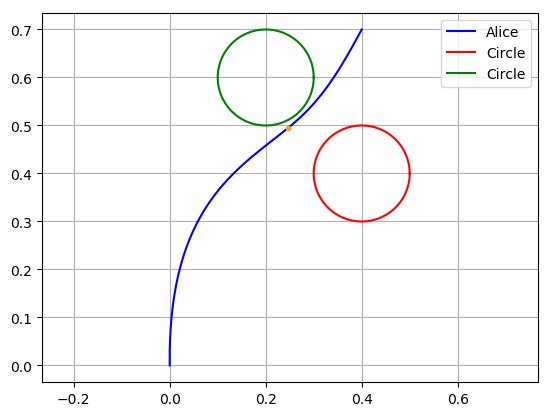

Optimal
Total energy: 291.58921174285433
Meeting location: (0.4, 0.7)
0.24591722001657726
0.49429754523573116


In [34]:
using JuMP, Gurobi, PyPlot, Ipopt

# Define model, variables, constraints, objective
m = Model(solver=IpoptSolver(print_level=0))

time = 60
start = [0, 0]
finish = [.4, .7]
time_step = 36
circle = [.4, .4]
r = .1

circle_2 = [.2, .6]
r_2 = .1

@variable(m, x_A[1:2, 1:time])
@variable(m, v_A[1:2, 1:time])
@variable(m, u_A[1:2, 1:time])

# x index on east/west, y index on north/south
@constraint(m, x_A[:, 1] .== start) # Alice's initial position
@constraint(m, v_A[:, 1] .== [0, 100]) # Alice's initial velocity 

# Our practice constraints
# for t in 34:36
#     #@constraint(m, (x_A[2, t] >= upper_bound))
#     @constraint(m, (x_A[2, t] <= lower_bound))
# end

for t in 1:time
   @NLconstraint(m, sqrt( (x_A[1,t]-circle[1])^2 + (x_A[2,t]-circle[2])^2 ) >= r + 0.01) 
   @NLconstraint(m, sqrt( (x_A[1,t]-circle_2[1])^2 + (x_A[2,t]-circle_2[2])^2 ) >= r_2 + 0.01) 
end

# Dynamic equations
for t in 1:time-1
    @constraint(m, x_A[:, t+1] .== x_A[:, t] + (1/3600)*v_A[:, t]) # Alice's position    
    @constraint(m, v_A[:, t+1] .== v_A[:, t] + u_A[:, t]) # Alice's velocity
end

@constraint(m, x_A[:, time] .== finish) # final location

@objective(m, Min, sum(u_A.^2)) # minimize total energy

# Solve
status = solve(m)
println(status)

# Output
x_A = getvalue(x_A)
println("Total energy: ", getobjectivevalue(m))
println("Meeting location: (", x_A[1,60],", ",x_A[2,60],")")

# Graph path
plot(x_A[1, :], x_A[2, :], color="blue", label="Alice")
plot(x_A[1, time_step], x_A[2, time_step], ".", color="orange")

# Plot circle
t = range(0,stop=2pi,length=100)         # parameter that traverses the circle
plot( circle[1] .+ r*cos.(t), circle[2] .+ r*sin.(t), label="Circle", color="red")  # plot circle radius r with center (x1, x2)
plot( circle_2[1] .+ r_2*cos.(t), circle_2[2] .+ r_2*sin.(t), label="Circle", color="green")  # plot circle radius r with center (x1, x2)
axis("equal")                            # make x and y scales equal

# Formatting
grid("on")
legend()
println(x_A[1,time_step])
println(x_A[2,time_step])
;